# Red Neuronal

Tutorial del descenso de gradiente por Alba Reinders Sánchez siguiendo el tutorial de  [Dot CSV](https://www.youtube.com/watch?v=W8AeOXa_FqU&list=PL-Ogd76BhmcCO4VeOlIH93BMT5A_kKAXp&index=4)

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

## Problema a resolver

El problema consiste en una clasificación donde los datos están distribuidos de forma circular

### Crear el DATASET

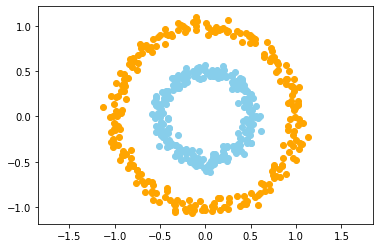

In [2]:
n = 500 #número de registros de los datos
p = 2 #número de características de cada dato

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) #factor es la distancia entre los círculos

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c = "orange")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c = "skyblue")
plt.axis("equal")
plt.show()

### Crear una clase para las capas

Recibirá por parámetro:

1. *n_conn*: el número de conexiones de la capa
2. *n_neur*: número de neuronas de la capa
3. *act_f*: función de activación de la capa

In [3]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        self.b = np.rand(1, n_neur) * 2 -1 #valor aleatorio entre -1 y 1
        self.W = np.rand(n_conn, n_neur) * 2 -1 #valor aleatorio entre -1 y 1

### Crear funciones de activación

**Función Sigmoide**: $\frac{1}{1+e^{-x}}$

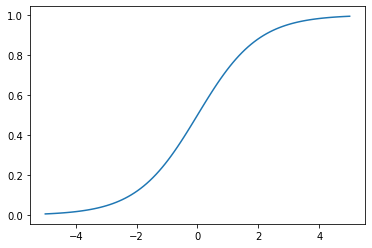

In [4]:
#Función sigmoide

sigm = lambda x: 1 / (1 + np.e ** (-x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm(_x))
plt.show()